In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
sealevel_df = pd.read_csv('./epa-sea-level.csv')

In [3]:
sealevel_df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
sealevel_df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [5]:
sealevel_df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

Text(0.5, 1.0, 'Sea Level change from 1880 - 2013')

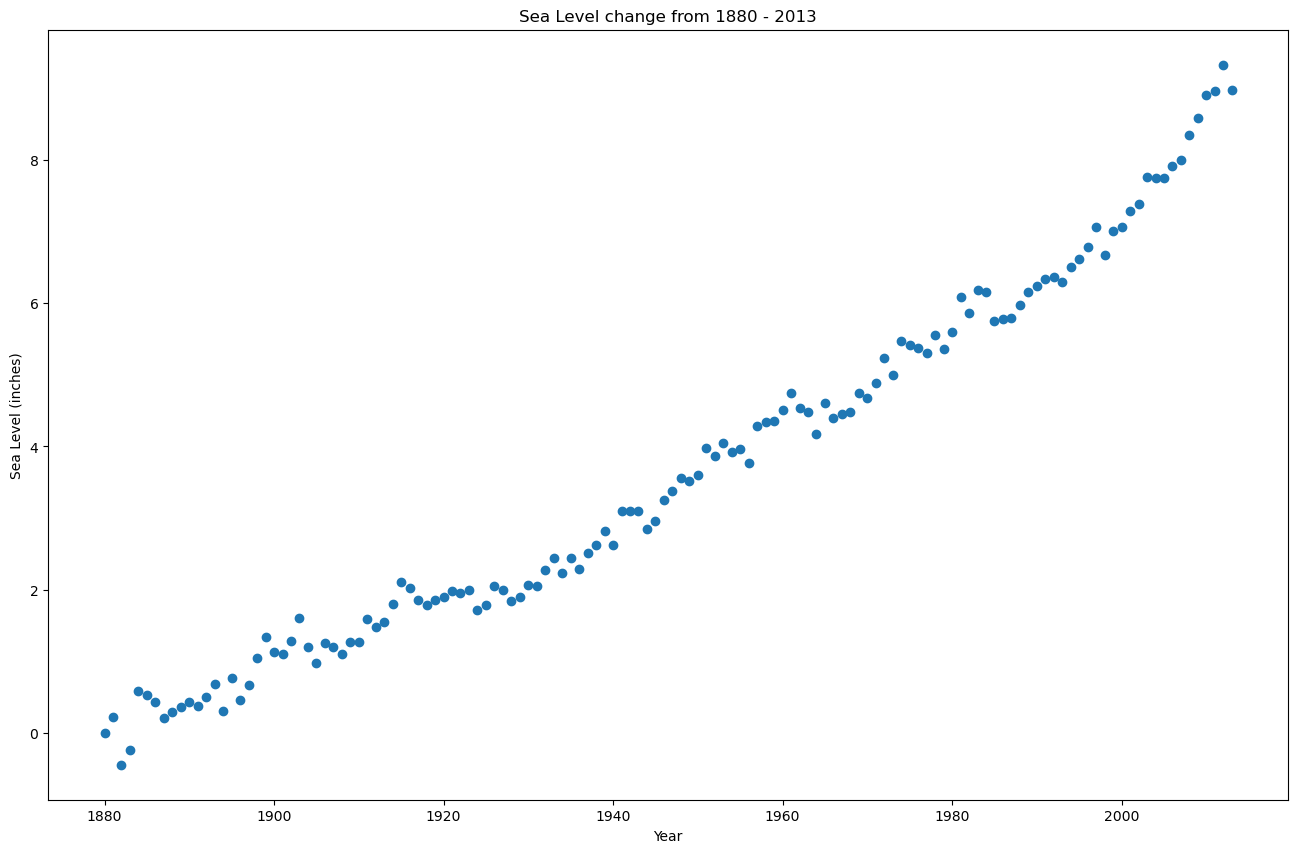

In [6]:
fig, axes = plt.subplots(figsize=(16, 10))
axes.scatter(x=sealevel_df['Year'], y=sealevel_df['CSIRO Adjusted Sea Level'])
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')
axes.set_title('Sea Level change from 1880 - 2013')

In [7]:
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
res = linregress(x=sealevel_df['Year'], y=sealevel_df['CSIRO Adjusted Sea Level'])
print(res.slope)
print(res.intercept)

0.0630445840121348
-119.06594196773978


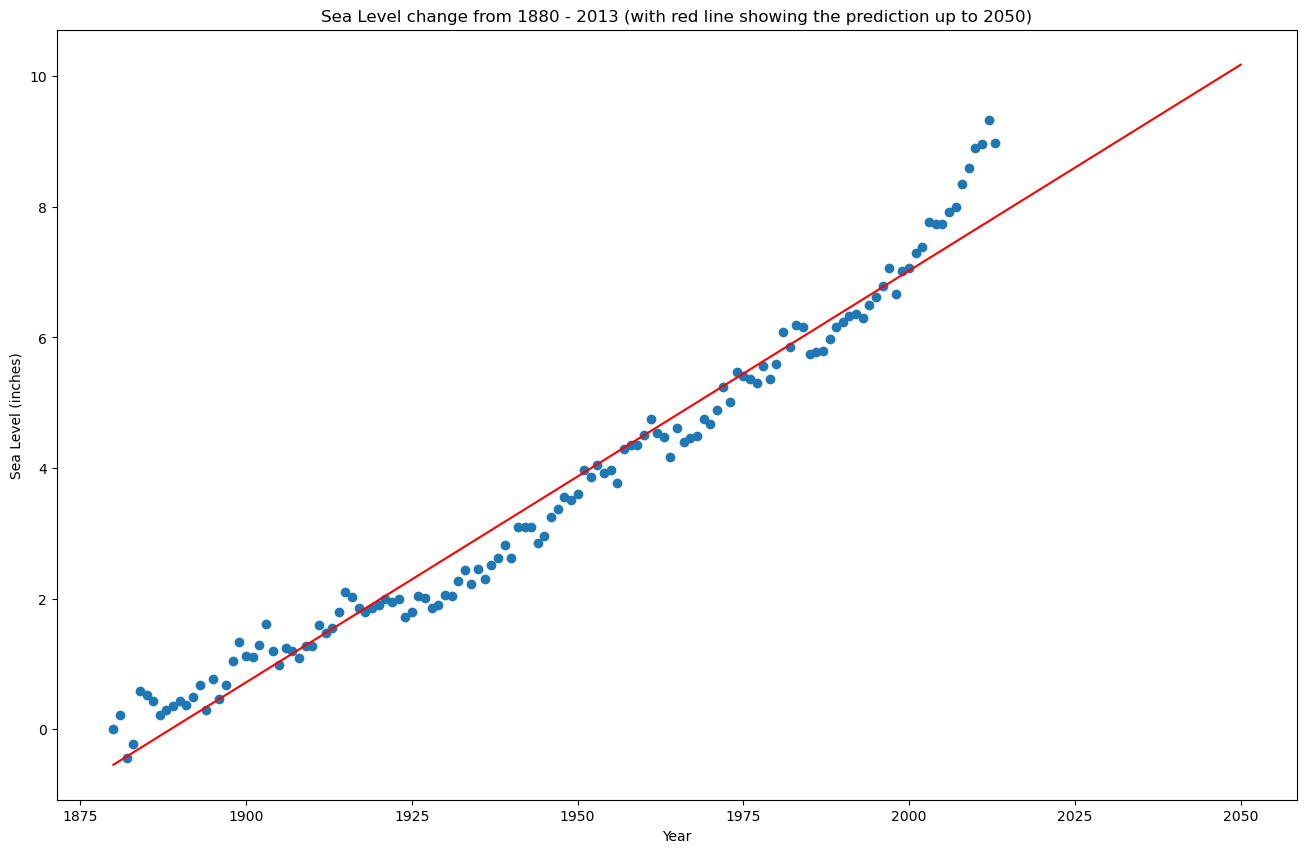

In [8]:
# Let's plot again with also showing the regression line
sealevel_year = sealevel_df['Year']
sealevel_year_up_to_2050 = np.arange(1880, 2051)
sealevel_level = sealevel_df['CSIRO Adjusted Sea Level']
fig, axes = plt.subplots(figsize=(16, 10))
axes.scatter(x=sealevel_year, y=sealevel_level)
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')
axes.set_title('Sea Level change from 1880 - 2013 (with red line showing the prediction up to 2050)')
axes.set_label('original data')
axes.plot(sealevel_year_up_to_2050, res.intercept + res.slope*sealevel_year_up_to_2050, color='r', label='fitted line')

In [9]:
# create a linear regression using data from 2000 to 2013
sealevel_starting_2000 = sealevel_df[(sealevel_df['Year'] >= 2000)]
sealevel_starting_2000.head()

regression_starting_year_2k = linregress(x=sealevel_starting_2000['Year'], y=sealevel_starting_2000['CSIRO Adjusted Sea Level'])


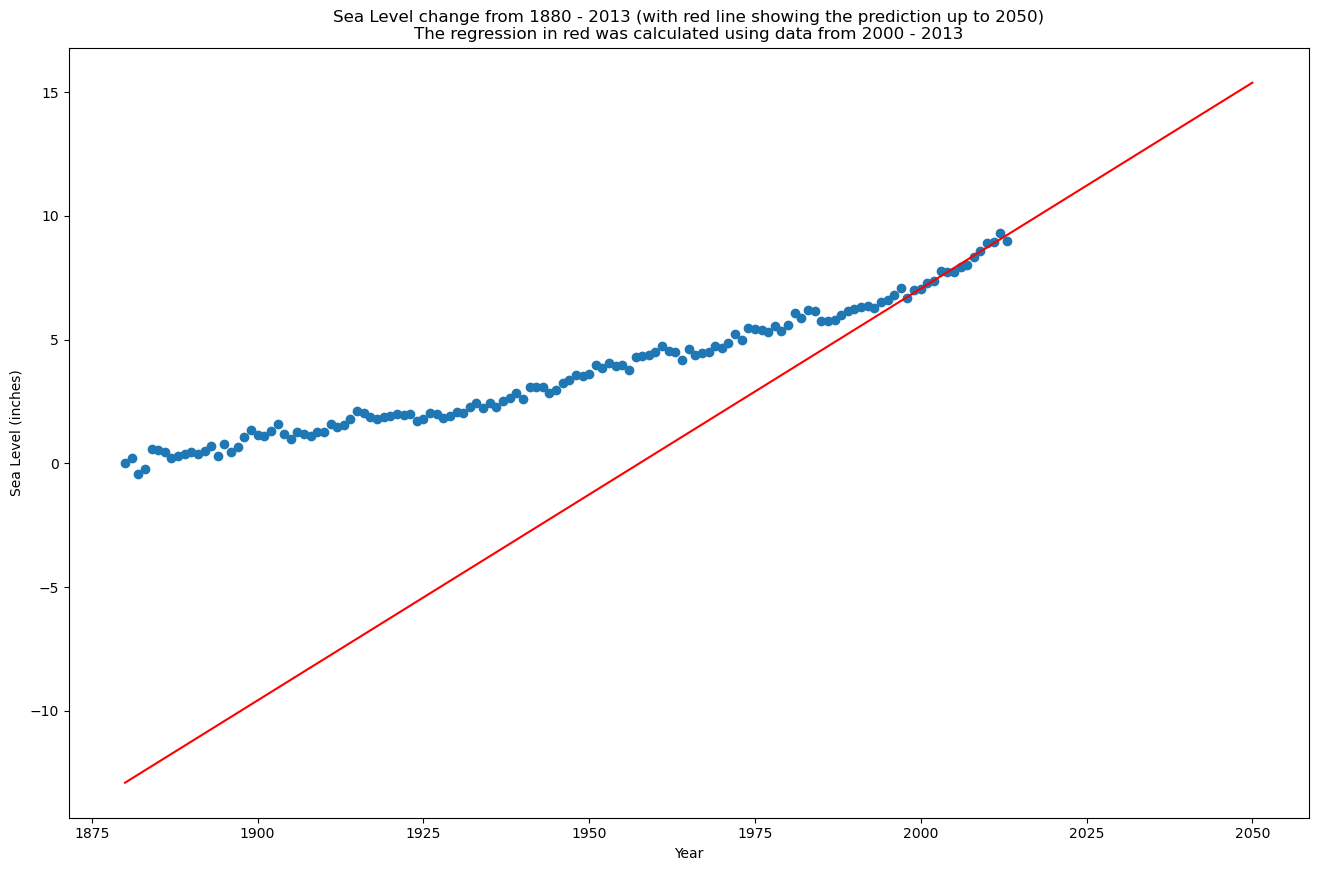

In [10]:
# Let's plot again with also showing the regression line
sealevel_year = sealevel_df['Year']
sealevel_year_up_to_2050 = np.arange(1880, 2051)
sealevel_level = sealevel_df['CSIRO Adjusted Sea Level']
fig, axes = plt.subplots(figsize=(16, 10))
axes.scatter(x=sealevel_year, y=sealevel_level)
axes.set_xlabel('Year')
axes.set_ylabel('Sea Level (inches)')
axes.set_title('Sea Level change from 1880 - 2013 (with red line showing the prediction up to 2050)\nThe regression in red was calculated using data from 2000 - 2013')
axes.set_label('original data')
axes.plot(sealevel_year_up_to_2050, regression_starting_year_2k.intercept + regression_starting_year_2k.slope*sealevel_year_up_to_2050, color='r', label='fitted line')

....
----------------------------------------------------------------------
Ran 4 tests in 0.736s

OK


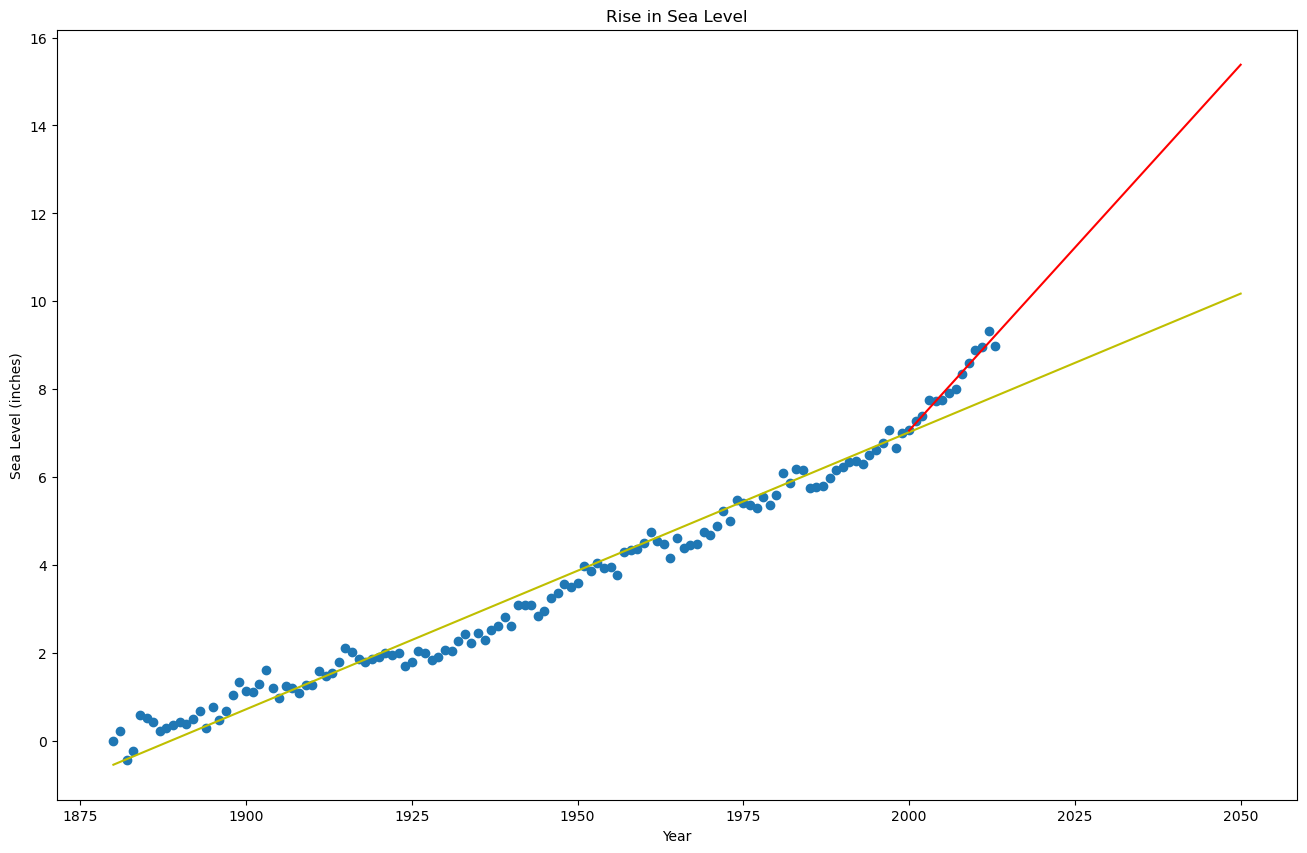

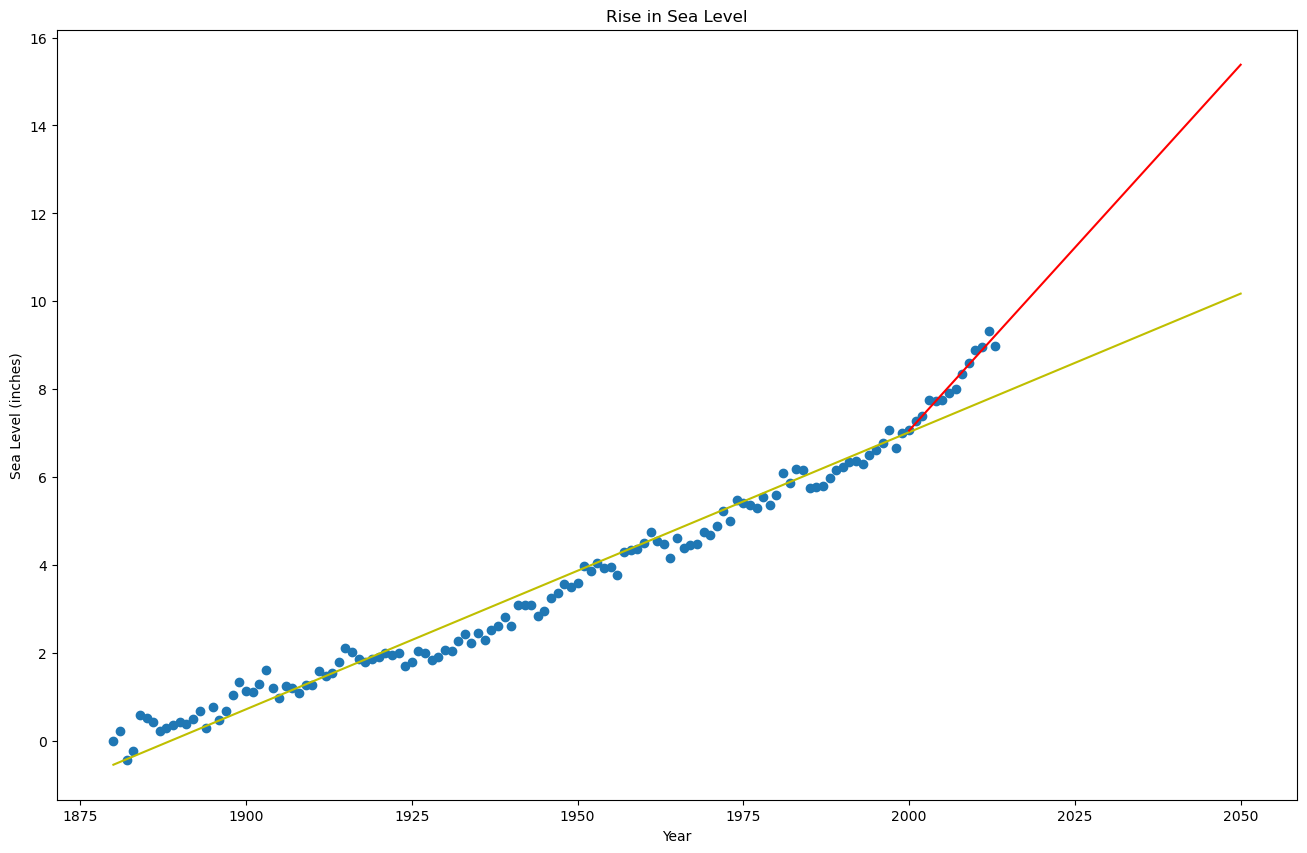

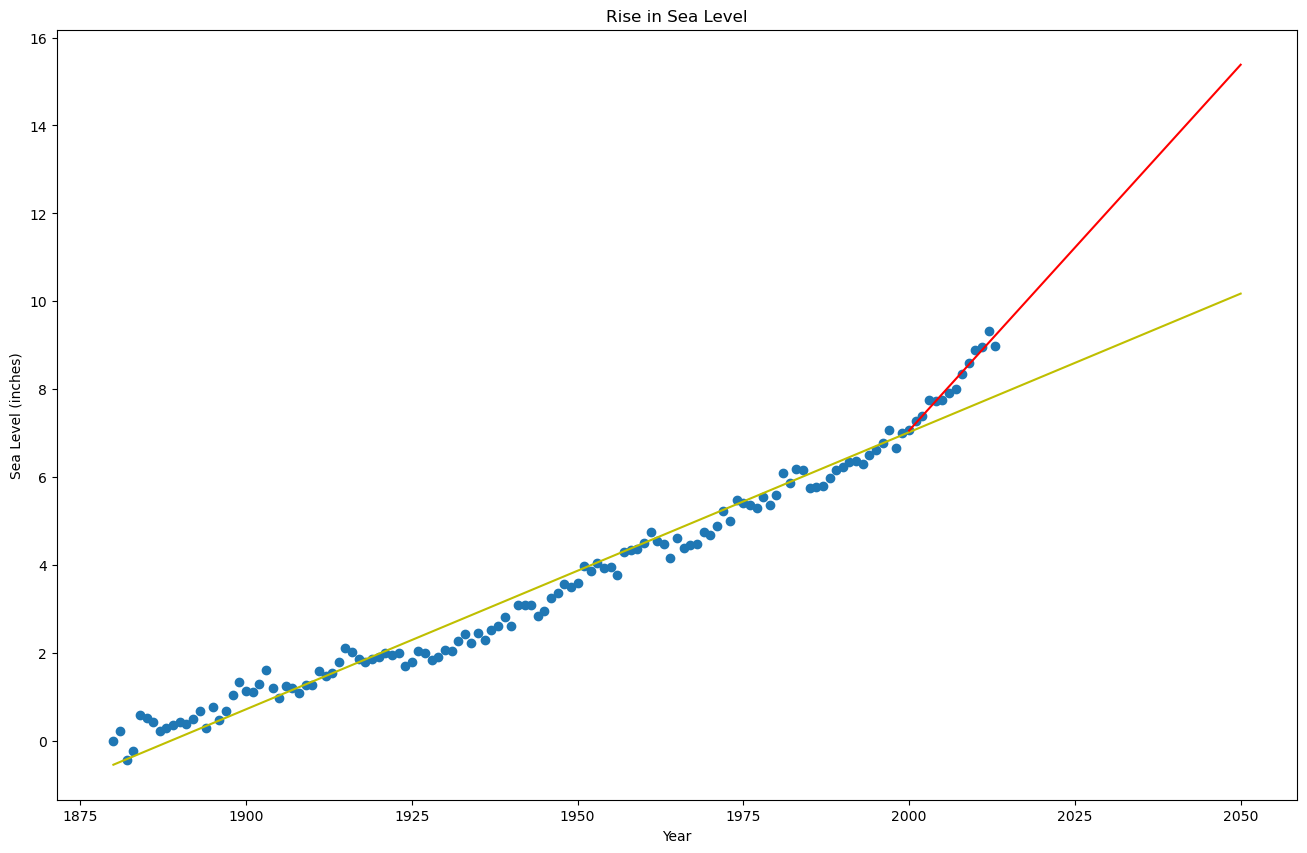

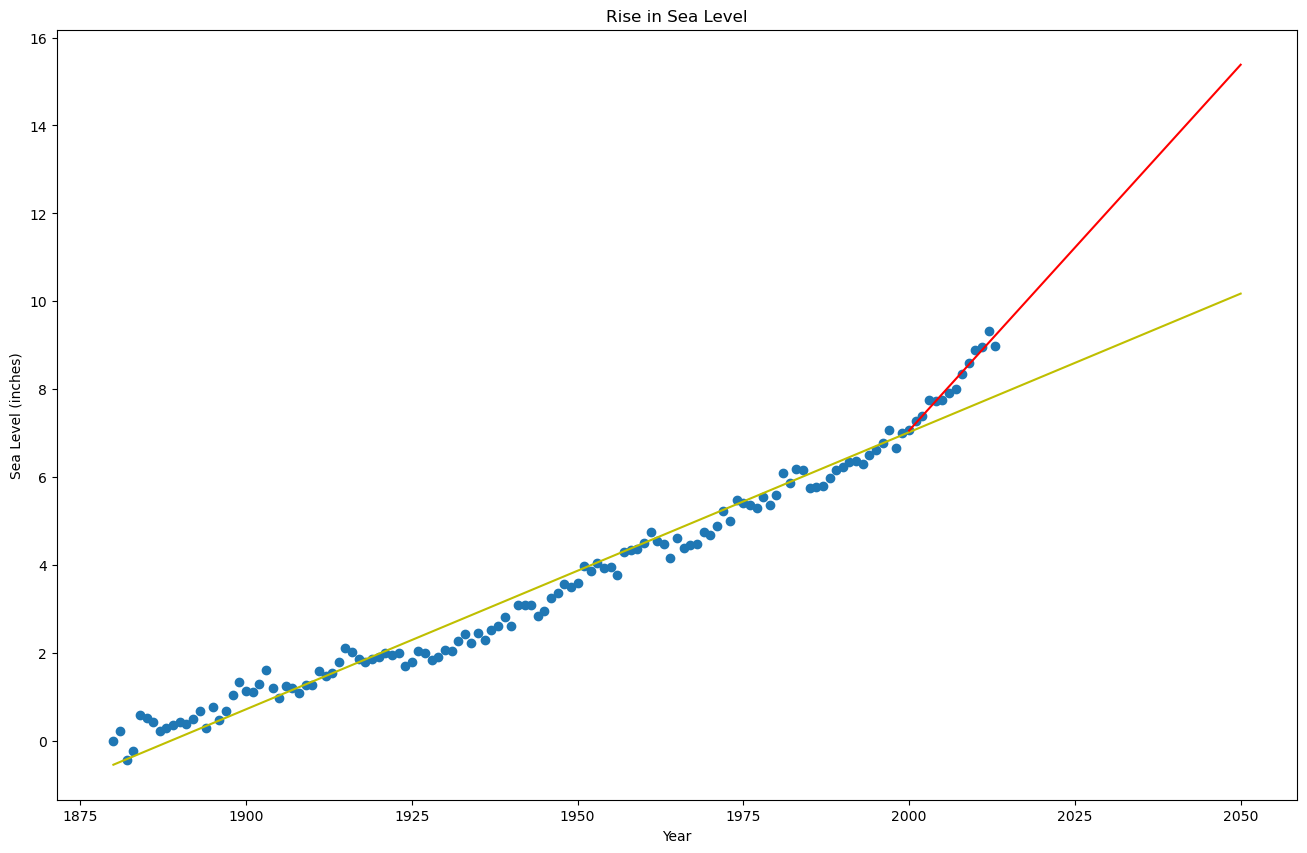

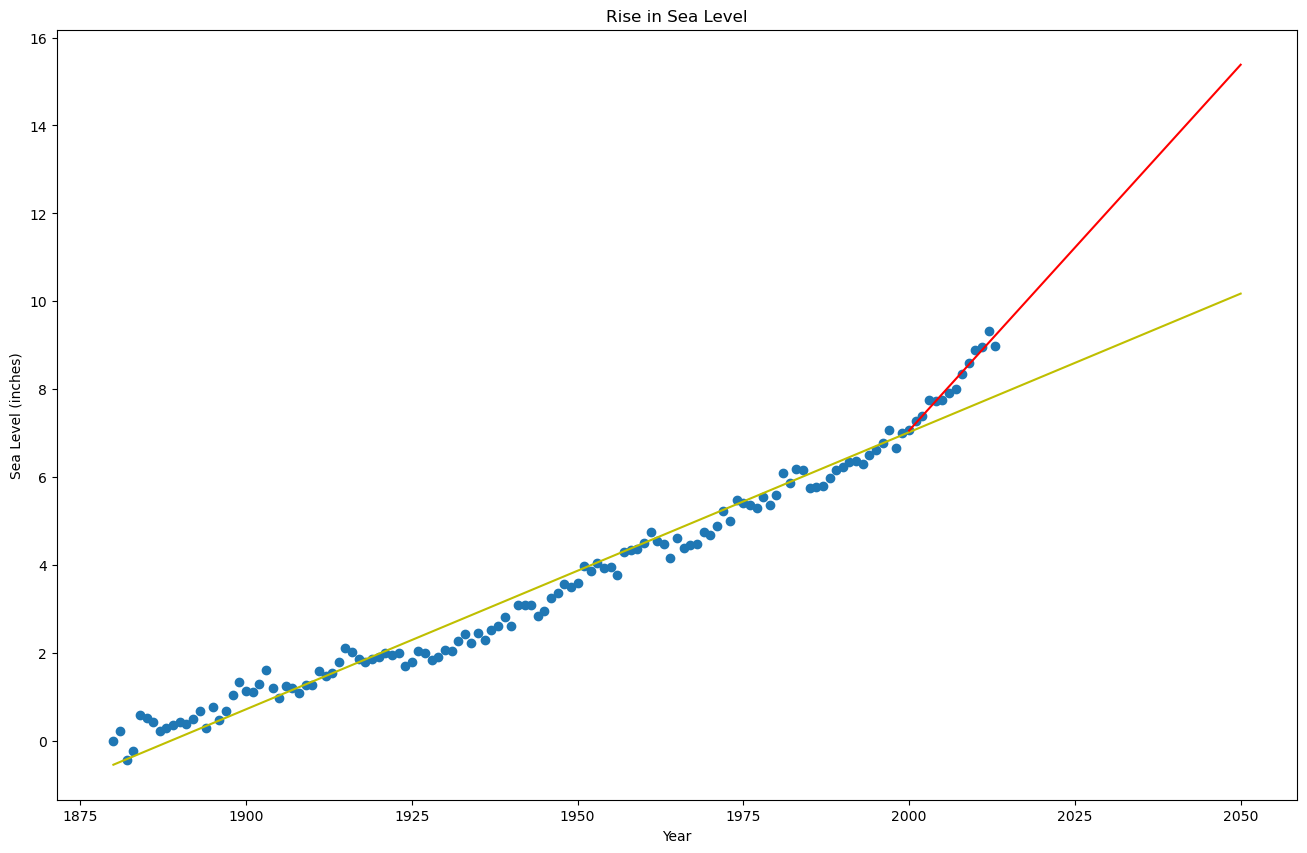

In [11]:
%run main.py